In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-50/50_Startups.csv


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('/kaggle/input/startup-50/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
#shape of our dataset
df.shape

(50, 5)

In [49]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [50]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [51]:
#description about data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


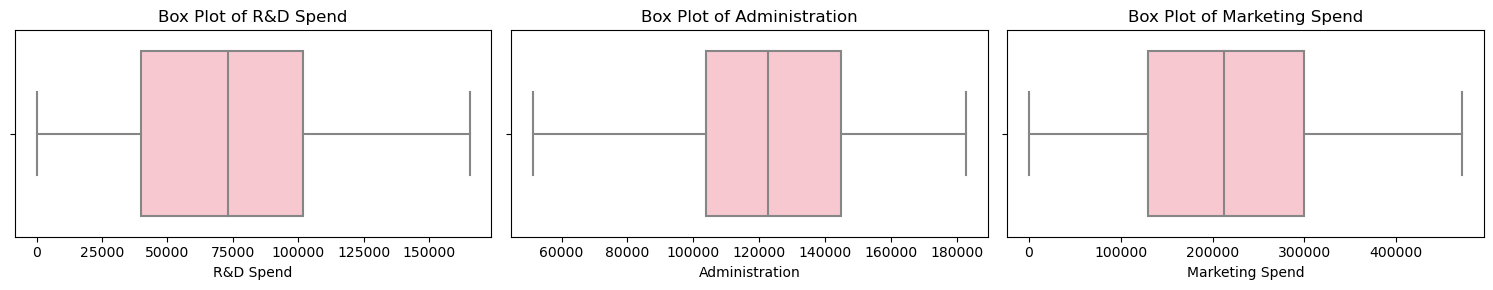

In [52]:
#Box Plot of independent variables an it seems we dont have outliers in our independent varables
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.boxplot(x=col,data=df,color='pink')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a

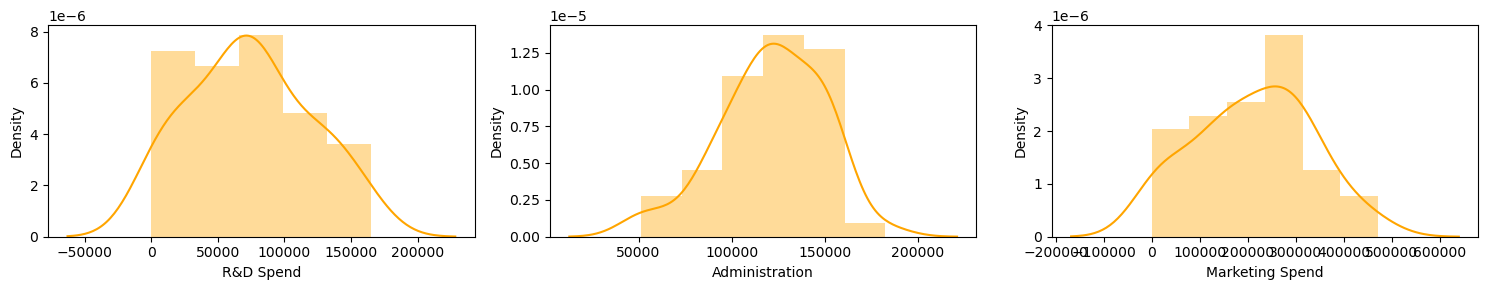

In [53]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.distplot(a=df[col],color='orange')
    plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


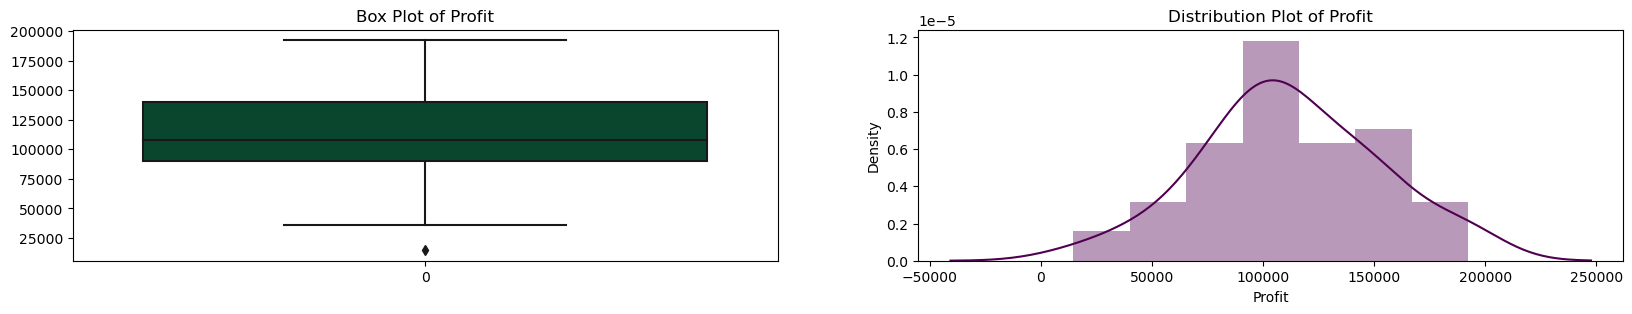

In [54]:
#Box Plot and Distribution Plot for Dependent variable PROFIT
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Profit,color='#005030')
plt.title('Box Plot of Profit')

plt.subplot(1,2,2)
sns.distplot(a=df.Profit,color='#500050')
plt.title('Distribution Plot of Profit')
plt.show()

In [55]:
#This is the outlier, since we see blow the R&D is higly correlated to the Proft
#Here R&D spend is zero so its obious the profit is very low for this startup
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [56]:
df[df['R&D Spend']<10000]


,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


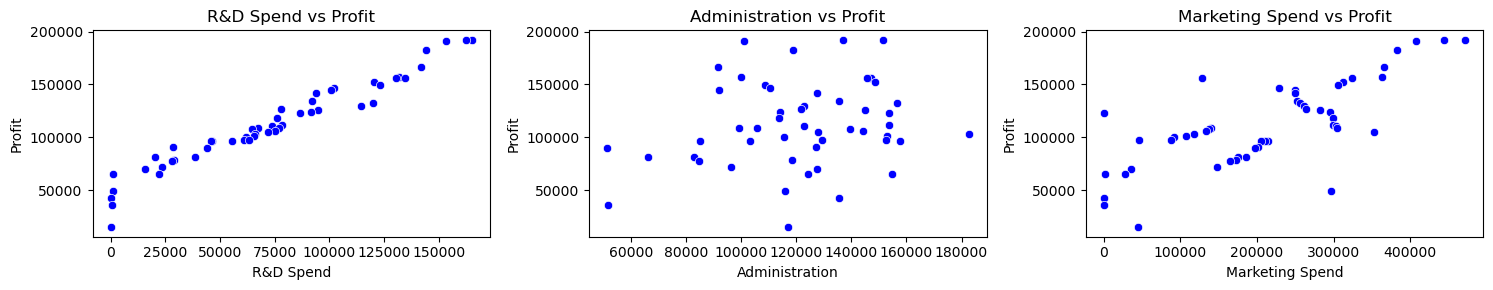

In [57]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=df,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

<AxesSubplot:title={'center':'Correlation Matrix'}>

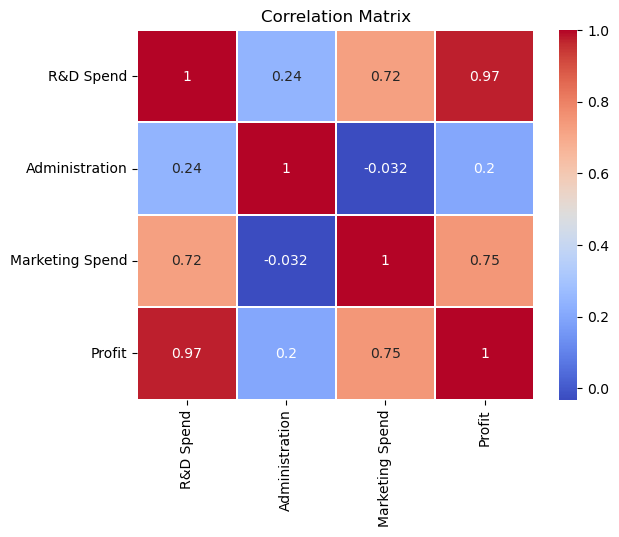

In [58]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

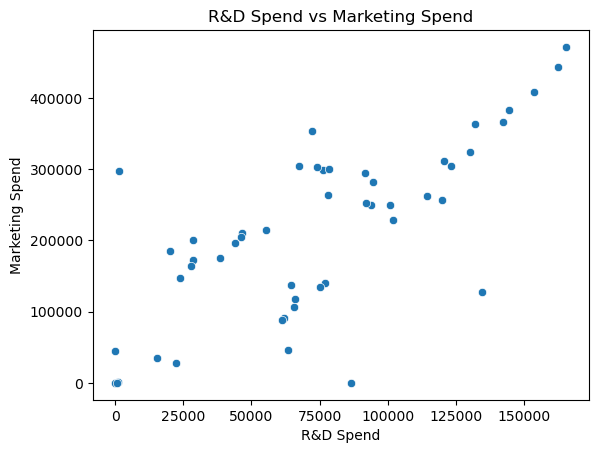

In [59]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=df)
plt.title("R&D Spend vs Marketing Spend")

In [60]:
df1 = df.copy()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
#droping column Marketing Spend (because of Multicollinearity with R&D Spend) 
#droping column Adminstration(because of very low correlation with Proft)
df2 = df1.drop(columns=['Marketing Spend','Administration'],axis=1)
df2.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


<AxesSubplot:>

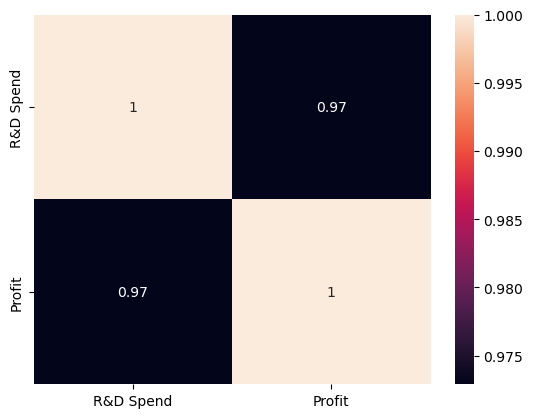

In [62]:
sns.heatmap(df2.corr(),annot=True)

In [63]:
#we have one Catgorical variable column also 'State'
#Lets explore and analyse it

df2.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [64]:
df2.groupby('State')['State'].count()

State
California    17
Florida       16
New York      17
Name: State, dtype: int64

In [65]:
#We will convert this column into dummy variables
df3 = pd.get_dummies(data=df2)
df3.head()

,R&D Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,192261.83,0,0,1
1,162597.70,191792.06,1,0,0
2,153441.51,191050.39,0,1,0
3,144372.41,182901.99,0,0,1
4,142107.34,166187.94,0,1,0


In [66]:
#To avoid dummy variable Trap, we will drop one dummy variable. Let us remove State_California
df4 = df3.drop(labels=['State_California'],axis=1)
df4.head()

,R&D Spend,Profit,State_Florida,State_New York
0,165349.20,192261.83,0,1
1,162597.70,191792.06,0,0
2,153441.51,191050.39,1,0
3,144372.41,182901.99,0,1
4,142107.34,166187.94,1,0


In [67]:
#Now we are done with data preprocessing steps
#Now will split our dataset into Dependent variable and Independent variable

X = df4.iloc[:,[0,2,3]].values
y = df4.iloc[:,1].values

In [68]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (50, 3)
Shape of Independent Variable y = (50,)


In [69]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [70]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (40, 3)
Shape of X_test = (10, 3)
Shape of y_train = (40,)
Shape of y_test = (10,)


In [71]:
from sklearn.metrics import r2_score

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

LinearRegression()

In [73]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9419418037649574

In [74]:
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [75]:
lm.score(X_train,y_train)

0.9419418037649574

In [76]:
y_pred = lm.predict(X_test)
data = {'y_test':y_test,'y_pred':y_pred.round(2)}
pd.DataFrame(data=data)

,y_test,y_pred
0,89949.14,86493.45
1,132602.65,154828.30
2,111313.02,115891.91
3,97427.84,102939.16
4,110352.25,115753.78
5,191792.06,187288.84
6,105733.54,116888.47
7,49490.75,53947.85
8,71498.49,69120.72
9,42559.73,49016.59


In [77]:
#coefficients of regression model
coeff = f'Profit = ({lm.intercept_} x Bias) '
for i,col in zip(range(3),df4.columns[[0,2,3]]):
    coeff+=f'+\n ({lm.coef_[i]} x {col}) '

print(coeff)

Profit = (49016.59479718076 x Bias) +
 (0.850394823133942 x R&D Spend) +
 (3812.594722758558 x State_Florida) +
 (213.31131094166278 x State_New York) 


In [78]:
##sns.residplot(y_test,y_pred,color='red')
#plt.xlabel('y_pred',size=15)
#plt.ylabel('Residues',size=15)


In [79]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.9516922088395385
Adjusted R^2 = 0.9275383132593078
